# **Reuters dataset**

La base de datos Reuters, se compone de 11,228 cables de noticias, los cuales pueden pertenecer a uno de 46 temas. Esta base de datos viene precargada en Keras:

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


El argumento num_words=10000 indica que sólo se tomarán en cuenta las 10,000 palabras más frecuentes de la base de datos, esto con la finalidad de reducir el tamaño de los vectores de entrada.

In [2]:
train_data[100] #Noticia 101 del conjunto de entrenamiento

[1,
 367,
 1394,
 169,
 65,
 87,
 209,
 30,
 306,
 228,
 10,
 803,
 305,
 96,
 5,
 196,
 15,
 10,
 523,
 2,
 3006,
 293,
 484,
 2,
 1440,
 5825,
 8,
 145,
 7,
 10,
 1670,
 6,
 10,
 294,
 517,
 237,
 2,
 367,
 8042,
 7,
 2477,
 1177,
 483,
 1440,
 5825,
 8,
 367,
 1394,
 4,
 169,
 387,
 66,
 209,
 30,
 2344,
 652,
 1496,
 9,
 209,
 30,
 2564,
 228,
 10,
 803,
 305,
 96,
 5,
 196,
 15,
 51,
 36,
 1457,
 24,
 1345,
 5,
 4,
 196,
 150,
 10,
 523,
 320,
 64,
 992,
 6373,
 13,
 367,
 190,
 297,
 64,
 85,
 1692,
 6,
 8656,
 122,
 9,
 36,
 1457,
 24,
 269,
 4753,
 27,
 367,
 212,
 114,
 45,
 30,
 3292,
 7,
 126,
 2203,
 13,
 367,
 6,
 1818,
 4,
 169,
 65,
 96,
 28,
 432,
 23,
 189,
 1254,
 4,
 9725,
 320,
 5,
 196,
 15,
 10,
 523,
 25,
 730,
 190,
 57,
 64,
 6,
 9953,
 2016,
 6373,
 7,
 2,
 122,
 1440,
 5825,
 8,
 269,
 4753,
 1217,
 7,
 608,
 2203,
 30,
 3292,
 1440,
 5825,
 8,
 43,
 339,
 43,
 231,
 9,
 667,
 1820,
 126,
 212,
 4197,
 21,
 1709,
 249,
 311,
 13,
 260,
 489,
 9,
 65,
 4753,
 

In [ ]:
len(train_data[100]) #Número de palabras en la crítica 101 del conjunto de entrenamiento

409

In [ ]:
train_labels[100] #La crítica 101 del conjunto de entrenamiento pertenece al tema 21.

20

Cada una de las instancias de la base de datos Reuters puede decodificarse fácilmente:

In [ ]:
#word_index es un diccionario que permite mapear cada palabra a su respectivo índice
word_index = reuters.get_word_index()
# Aplicamos la operación inversa, es decir, mapeamos de índices a palabras.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Procedemos a decodificar la crítica. La razón por la que a cada índice le restamos 3, es
#porque 0, 1 y 2 son índices reservados para los valores de "padding", "comienzo de la secuencia" y "desconocido".
# El argumento "?" se regresa en caso de que el índice en cuestión no tenga ninguna palabra asociada.
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

# **Preprocesamiento de los datos**

Aplicamos el enfoque de one-hot encoding a los datos de entrada. Por ejemplo, si una de nuestras instancias se representa por la lista [2, 7, 15], al aplicar one-hot encoding, dicha lista se convertirá en un vector de 10,000 elementos, donde a los índices 2, 7 y 15, se les asignará el valor de 1. La razón por la que se aplica esta operación en los datos de entrada, es porque las redes neuronales convolucionales no reciben como entrada listas de valores, sino tensores.

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Creamos matrices de ceros con dimensiones (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # le asignamos el valor de uno al índice correspondiente
    return results

# Conjunto de entrenamiento vectorizado
x_train = vectorize_sequences(train_data)
# Conjunto de prueba vectorizado
x_test = vectorize_sequences(test_data)

Asimismo, aplicamos one-hot encoding a las etiquetas de los conjuntos de entrenamiento y prueba. Esto genera que cada etiqueta se convierta en un vector de 0's de 46 dimensiones, con un 1 asignado al índice asociado a la etiqueta.

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Etiquetas de entrenamiento vectorizadas
one_hot_train_labels = to_one_hot(train_labels)
# Etiquetas de prueba vectorizadas
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
one_hot_train_labels[34]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Keras posee una función que permite realizar one-hot encoding de forma automática:

In [ ]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# **Construcción de la red neuronal**

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# **Compilación**

In [ ]:
model.compile(optimizer='rmsprop',# lr=1e-4
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **Validación**

Buscando evaluar el rendimiento del modelo durante la fase de entrenamiento, construimos el conjunto de validación a partir del conjunto de entrenamiento.

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
#Conjunto de validación
len(x_val)

1000

In [ ]:
#Conjunto de validación
len(partial_x_train)

7982

# **Entrenamiento**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 167us/step - loss: 2.7137 - accuracy: 0.5128 - val_loss: 1.7956 - val_accuracy: 0.6240
Epoch 2/20
7982/7982 [==============================] - 1s 124us/step - loss: 1.4592 - accuracy: 0.7005 - val_loss: 1.3236 - val_accuracy: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s 126us/step - loss: 1.0696 - accuracy: 0.7642 - val_loss: 1.1220 - val_accuracy: 0.7560
Epoch 4/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.8331 - accuracy: 0.8256 - val_loss: 1.0241 - val_accuracy: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.6596 - accuracy: 0.8632 - val_loss: 0.9514 - val_accuracy: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.5216 - accuracy: 0.8951 - val_loss: 0.9465 - val_accuracy: 0.7880
Epoch 7/20
7982/7982 [==============================] - 1s 130us/step - loss

# **Curva de pérdida**

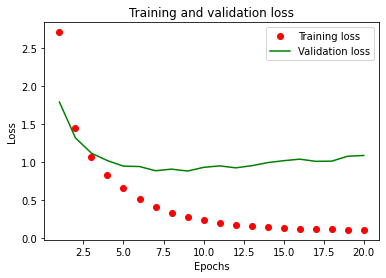

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Curva de precisión**

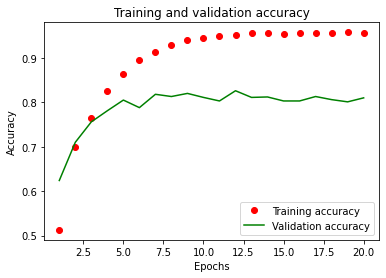

In [ ]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Con base a las gráficas previas, podemos observar que, aproximadamente a partir de la época 10, el modelo deja de mejorar y comienza a presentarse una disminución en su rendimiento.

# **Re-entrenamiento y evaluación del modelo final**

Una vez que se seleccionó el modelo tomando como base el rendimiento de este en el conjunto de validación, una práctica recomendada es volver a entrar la arquitectura con los mismos parámetros con los que se generó el modelo seleccionado y con el conjunto de entrenamiento original, es decir, integrado el conjunto de validación al conjunto de entrenamiento "parcial". 

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Entrenamos el modelo en el conjunto de entrenamiento original
model.fit(x_train, one_hot_train_labels, epochs=12, batch_size=512)
#Evaluamos el modelo final
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/12
8982/8982 [==============================] - 1s 124us/step - loss: 2.6249 - accuracy: 0.5242
Epoch 2/12
8982/8982 [==============================] - 1s 118us/step - loss: 1.3916 - accuracy: 0.7091
Epoch 3/12
8982/8982 [==============================] - 1s 119us/step - loss: 1.0216 - accuracy: 0.7793
Epoch 4/12
8982/8982 [==============================] - 1s 118us/step - loss: 0.7994 - accuracy: 0.8343
Epoch 5/12
8982/8982 [==============================] - 1s 121us/step - loss: 0.6316 - accuracy: 0.8731
Epoch 6/12
8982/8982 [==============================] - 1s 118us/step - loss: 0.5042 - accuracy: 0.8980
Epoch 7/12
8982/8982 [==============================] - 1s 117us/step - loss: 0.4083 - accuracy: 0.9169
Epoch 8/12
8982/8982 [==============================] - 1s 120us/step - loss: 0.3350 - accuracy: 0.9275
Epoch 9/12
8982/8982 [==============================] - 1s 118us/step - loss: 0.2811 - accuracy: 0.9369
Epoch 10/12
8982/8982 [==============================] - 1s 117u

In [ ]:
results

[1.075651934182973, 0.7880676984786987]

# **Predicciones del modelo final**

Luego de generar un modelo apropiado para clasificar cables de noticias, podemos usarlo para predecir la probabilidad de que cada nueva noticia que sea leída por el modelo, se clasifique como uno de los 46 tipos. Este proceso predictivo es muy importante, ya que así es como se desplegaría esta red neuronal en "la vida real", es decir, en algún servicio de consumo.

In [ ]:
predictions = model.predict(x_test)

Cada fila del tensor predictions, es un vector de 46 elementos.

In [ ]:
predictions[56].shape

(46,)

Al sumar las probabilidades almacenadas en cada índice de un vector en particular, el resultado es 1.

In [ ]:
predictions[56]

array([1.2775817e-02, 2.9554022e-03, 1.3314779e-01, 5.1634531e-02,
       3.9428198e-03, 1.1625483e-02, 4.5654885e-03, 3.2036973e-04,
       1.1175628e-03, 1.2189067e-02, 1.4281656e-03, 8.4389858e-03,
       9.7939360e-04, 1.3640598e-02, 1.7444724e-02, 2.5311720e-02,
       1.9382713e-02, 7.8080120e-03, 5.1043788e-03, 9.0430077e-04,
       2.9015608e-04, 5.0132949e-04, 7.6925186e-03, 5.6794421e-03,
       1.6645206e-02, 1.4145850e-02, 3.2715443e-01, 2.2252187e-02,
       1.7619714e-02, 1.0566315e-02, 1.5466869e-03, 1.1259998e-01,
       4.3488014e-02, 4.0810010e-03, 8.2582212e-04, 8.1008027e-04,
       6.4408820e-04, 3.0868987e-02, 1.0155461e-03, 2.1192319e-04,
       4.0577548e-03, 2.2392986e-02, 6.1506429e-03, 2.9487833e-03,
       1.6940933e-03, 9.3991999e-03], dtype=float32)

In [ ]:
np.sum(predictions[56])

1.0000001

El índice que almacena el valor mayor, representa la clase a la que corresponde la entrada:

In [ ]:
np.argmax(predictions[56])

26

**NOTA:** La información presentada en este notebook, fue tomada de https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.6-classifying-newswires.ipynb. La única variación sutil del presente notebook con respecto a la fuente original, tiene que ver con la descripción de ciertas partes del código.